In [24]:
from sklearn.datasets import make_regression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [36]:
X,y = make_regression(n_samples=100,n_features=1,random_state=120,noise=40)

In [37]:
plt.style.use('seaborn')

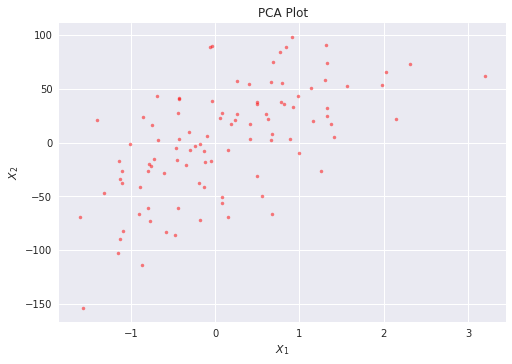

In [42]:
fig, ax = plt.subplots()
ax.plot(X,y,'r.',alpha=0.5)
ax.set_xlabel(r'$X_1$')
ax.set_ylabel(r'$X_2$')
ax.set_title('PCA Plot')
plt.savefig('../figures/PCA_raw.png',dpi=200)
plt.show()

Make a new dataset for PCA (more obvious) and visualize the relationship of the data

In [239]:
cov = np.array([
    [2, 1.5],
    [1.5, 2]
])

X = np.random.multivariate_normal([5,7],cov,size=100)

Plot the data

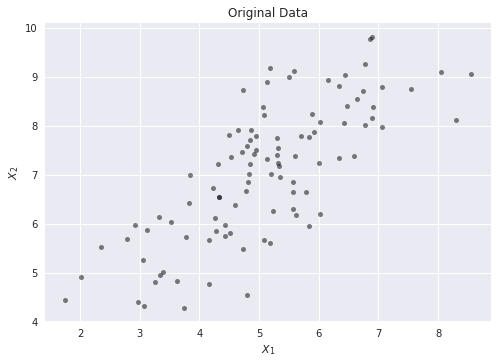

In [240]:
fig, ax = plt.subplots()
ax.plot(X[:,0],X[:,1],'k.',alpha=0.5,markersize=10)
ax.set_xlabel(r'$X_1$')
ax.set_ylabel(r'$X_2$')
ax.set_title('Original Data')
plt.savefig('../figures/PCA_orig.png',dpi=200)

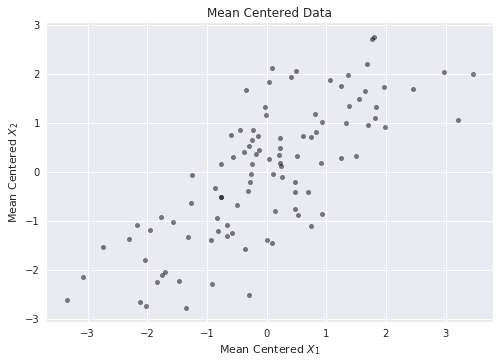

In [241]:
#Step 1: Mean centre the data
X = X - X.mean(axis=0)
fig,ax1 = plt.subplots()
ax1.plot(X[:,0],X[:,1],'k.',alpha=0.5,markersize=10)
ax1.set_xlabel(r'Mean Centered $X_1$')
ax1.set_ylabel(r'Mean Centered $X_2$')
ax1.set_title('Mean Centered Data')
plt.savefig('../figures/PCA_centered.png',dpi=200)

In [242]:
#Step 3: Calculate covariance matrix and perform singular value decomposition
sample_cov = (X.T@X)/X.shape[0]
U, S, V = np.linalg.svd(sample_cov)
new_S = np.zeros_like(U,dtype=np.float64)
new_S[0,0] = S[0]
new_S[1,1] = S[1]
S = new_S

In [259]:
#Calculate variance explained
totalvar = sample_cov.diagonal().sum()
var_explained = new_S.diagonal()/totalvar

In [260]:
var_explained

array([0.8805857, 0.1194143])

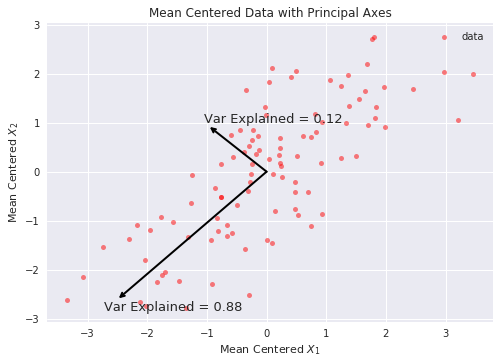

In [275]:
#Plot principal axes
eval1 = np.linspace(-5,5,5)

p1 = (-V[0,0]*eval1)/V[0,1]
p2 = (-V[1,0]*eval1)/V[1,1]

def draw_vector(v0,v1,ax=None):
    ax = ax or plt.gca()
    arrowprops = {'arrowstyle' : '->',
                 'linewidth':2,
                 'shrinkA':0,
                 'shrinkB':0}
    ax.annotate('',v1,v0,arrowprops=arrowprops)

fig, ax = plt.subplots()
ax.plot(X[:,0],X[:,1],'r.',alpha=0.5,markersize=10,label='data')

ax.set_xlim(ax1.get_xlim())
ax.set_ylim(ax1.get_ylim())
for i in np.arange(0,V.shape[0]):
    
    vec = V[i,:] * 2 * np.sqrt(S[i,i])
    draw_vector(np.array([0,0],dtype=np.float64), 0+vec)
    ax.annotate('Var Explained = {:.2f}'.format(var_explained[i]),[0,0],vec*1.1,fontsize=13)

ax.set_xlabel(r'Mean Centered $X_1$')
ax.set_ylabel(r'Mean Centered $X_2$')
ax.set_title('Mean Centered Data with Principal Axes')

ax.legend()
plt.savefig('../figures/PCA_SVD.png',dpi=200)

Rotate into Principal Components Space

In [244]:
transform_X = (U @ X.T).T

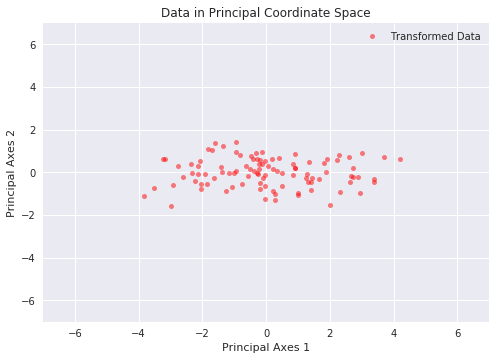

In [245]:
#Plot
fig, ax = plt.subplots()
ax.plot(transform_X[:,0],transform_X[:,1],'r.',alpha=0.5,markersize=10,label='Transformed Data')
ax.set_xlabel('Principal Axes 1')
ax.set_ylabel('Principal Axes 2')
ax.set_xlim(-7,7)
ax.set_ylim(-7,7)
ax.set_title('Data in Principal Coordinate Space')
ax.legend()
plt.savefig('../figures/PCA_rotated.png',dpi=200)
plt.show()

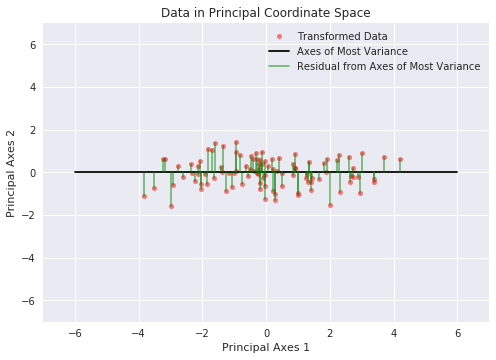

In [246]:
fig, ax = plt.subplots()
ax.plot(transform_X[:,0],transform_X[:,1],'r.',markersize=10,alpha=0.5,label='Transformed Data')
ax.plot([-6,6],[0,0],'k',label='Axes of Most Variance')

for x in transform_X:
    ax.plot([x[0],x[0]], [x[1],0],'g',alpha=0.5)

ax.plot([x[0],x[0]], [x[1],0],'g',alpha=0.5,label='Residual from Axes of Most Variance')
ax.set_xlabel('Principal Axes 1')
ax.set_ylabel('Principal Axes 2')
ax.set_xlim(-7,7)
ax.set_ylim(-7,7)
ax.set_title('Data in Principal Coordinate Space')
ax.legend()
plt.savefig('../figures/PCA_residuals.png',dpi=200)
plt.show()

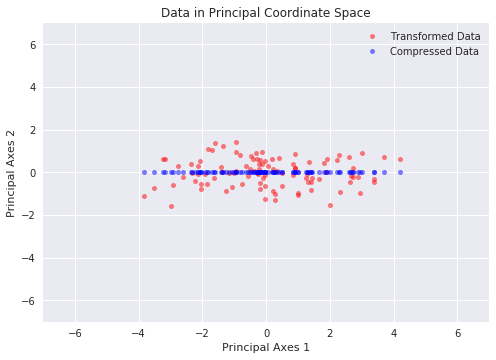

In [247]:
fig, ax = plt.subplots()
ax.plot(transform_X[:,0],transform_X[:,1],'r.',alpha=0.5,markersize=10,label='Transformed Data')
ax.plot(transform_X[:,0], np.zeros((transform_X.shape[0],1)), 'b.',markersize=10,alpha=0.5,label='Compressed Data')
ax.set_xlabel('Principal Axes 1')
ax.set_ylabel('Principal Axes 2')
ax.set_xlim(-7,7)
ax.set_ylim(-7,7)
ax.set_title('Data in Principal Coordinate Space')
ax.legend()
plt.savefig('../figures/PCA_compressed.png',dpi=200)
plt.show()